# Perturbation Methods 2

Lecture 12 - February 26, 2018.

Math 502 - Winter 2018

Last lecture, we covered a perturbation method from Chapter 4 in Fowler. 

I will remind you that you should read these chapters, either before or after lecture. (Fowler is available online.) 

Howison has a somewhat different approach, which might make things a bit more clear. See Chapter 16 in Howison, on Boundary Layers (also available online.


### Boundary layers

Howison sets up these problems as an example of studying ** boundary layers.** For instance, think of the airflow over a plane wing. Close to the wing, the air bends a lot and interacts with the wing as it tries to flow over the wing -- this is the boundary layer. Far from the wing, the air just flows as if there was no plane wing around. So you have two types of behavious -- near the wing, and far from the wing.

A more relevant example for Calgary. If you stand outside in the cold air, the air right near your face stays relatively warm (if it is not windy, and you don't move too fast). So you might expect the temperature on the boundary near you face to behave one way (staying warm), then drop off quickly to something colde far from your face.

Often, the ''drop off'' is exponentially fast, which is why we can use perturbation methods to deal with the boundary.

### Simple example

Suppose we have a function of the form
$$f(x;\epsilon) = e^{-x/\epsilon}g(x) + h(x), \qquad 0<x<1, \epsilon << 1,$$
where $f,g$ are functions of $O(1)$, (like $\sin(x)$ of $\cos(x)$, for sxample), and $\epsilon$ is a small parameter.

When $x$ is close to 1, the exponential term is really small, so we have 
$$f(x;\epsilon) \approx h(x)  \mbox{ for } x \approx O(1).$$
This is called the **outer expansion** (outside the boundary layer) and we notice the error terms are exponentially small.

When $x$ is close to zero, the behaviour in this example is given mainly by the exponential factor, so
$$f(x;\epsilon) \approx e^{-x/\epsilon}g(0)  + h(0) \mbox{ for } x \approx O(\epsilon).$$
The error here may not be exponentially small, but hopefully in given examples we can estimate the error well.

We will eventually rescale this as $x = \epsilon X$ to get the **inner expansion** which is essentially the boundary layer behaviour. 





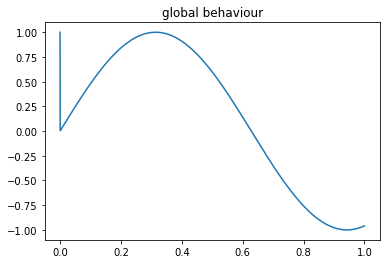

In [9]:
### lets plot an example

from numpy import *
from matplotlib.pyplot import *

eps = .0001
def g(x):
    return cos(5*x)
def h(x):
    return sin(5*x)
def f(x):
    return g(x)*exp(-x/eps) + h(x)

x = linspace(0,1,10000)
plot(x,f(x))
title('global behaviour');

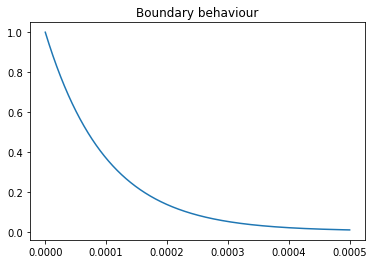

In [8]:
x = linspace(0,5*eps,10000)
plot(x,f(x))
title('Boundary behaviour');

## Matching inner and outer

We will end up eventually with two different expressions for the solution, one inner, and one outer. There are many ways where you can try to match these up. Howison suggests the Van Dyke method.

The Van Dyke method basically says to do a regular $\epsilon$ expansion for both the inner and outer approximations, then truncate to a certain number of terms. These two trunctions should match -- and this becomes youg global approximate solution.

Let's start with an example, where we know the function involved.
 
Suppose we have the general form
$$f(x;\epsilon) = e^{-1/\epsilon} g(x;\epsilon) + h(x;\epsilon).$$

The g and h might have an expansion in $\epsilon$ like this
$$g \approx g_0(x) +\epsilon g_1(x) + \cdots, \qquad
h \approx h_0(x) +\epsilon h_1(x) + \cdots,$$
for x in the doman $[0,1]$. For instance
$$f(x;\epsilon) = e^{-x/\epsilon} (1 + x) + x + e^{\epsilon x},$$ has
$$g(x;\epsilon) = 1 + x, \qquad
h(x;\epsilon) = x + e^{\epsilon x} \approx 1 + x + \epsilon x + \frac{1}{2}\epsilon^2 x^2 + \cdots.$$

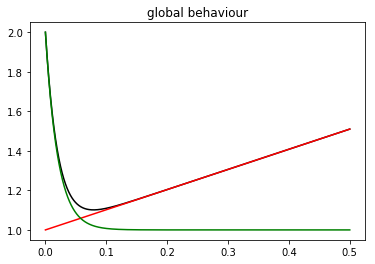

In [18]:
##Let's plot
eps = .02
def g(x):
    return 1+x
def h(x):
    return x + exp(eps*x)
def f(x):
    return g(x)*exp(-x/eps) + h(x)

x = linspace(0,.5,10000)
plot(x,f(x),'k',x,h(x),'r',x,f(x) - h(x) + h(0),'g')
title('global behaviour');

### Outer expansion

The $e^{-x/\epsilon}$ factor goes to zero as $\epsilon\rightarrow 0$ so we can neglect it, in comparison to any power of $\epsilon$, so our outer expansion for $f$ just comes from the $h$ term

$$f(x;\epsilon) \approx 1 + x + \epsilon x + \frac{1}{2}\epsilon^2 x^2 + \cdots.$$

This is a good approximation for $x>>\epsilon$ but it fails miserably near $x=0$ (see graph).


## Inner expansion

To get the inner expansion or **boundary layer** we set $x = \epsilon X$ and the function becomes
$$f(x;\epsilon) = F(X;\epsilon) = g(\epsilon X) e^{-X} + h(\epsilon X).$$
A Taylor series expansion gives
$$F(X;\epsilon) \approx e^{-X}(g(0) + \epsilon X g'(0) + \cdots) + h(0) + \epsilon Xh'(0) + \cdots).$$
$$= F_0(X) + \epsilon F_1(X) + \cdots.$$
This is the **inner expansion.**

In our example,
$$F(X;\epsilon) = e^{-X}(1 + \epsilon X) + \epsilon X + e^{\epsilon^2 X}$$
$$\approx 1 + e^{-X} + \epsilon(Xe^{-X} + X) + \epsilon^2 X + \cdots.$$


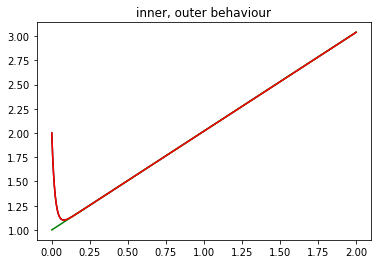

In [30]:
##Let's plot
eps = .02
def outf(x):
    return 1+x + eps*x + .5*(eps**2)*(x**2)
def inf(x):
    X = x/eps
    return 1 + exp(-X) + eps*(X*exp(-X) + X) +eps*eps*X
def f(x):
    return g(x)*exp(-x/eps) + h(x)

x = linspace(0,.5,10000)
plot(x,f(x),'k',x,outf(x),'g',x,inf(x),'r')
title('inner, outer behaviour');

/Users/mikel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


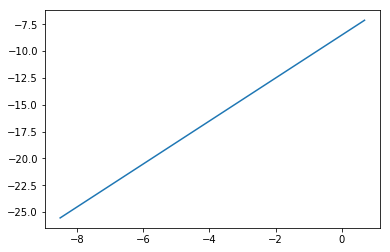

In [32]:
plot(log(x),log(f(x)-inf(x)))

Hmm. Inner expansion looks too good. What did I do here?



### Van Dyke matching principle

- the m-term inner expansion, of the n-term outer expansion
- matches with
- the n-therm outer expansion of the m-term inner expansion.